In [1]:
# Problem 6: Implement Principal Component Analysis (PCA) from scratch.

In [1]:
import numpy as np 
import pandas as pd 

In [3]:
from sklearn.datasets import make_classification

In [21]:
class PCA :
    def __init__(self, n_component):
        self.n_component = n_component
        self.mean = None 
        self.components = None

    def fit(self, x):
        ## mean centerning : subtracting mean 
        self.mean = np.mean(x)
        X = x- self.mean
        print("the new x is :",X)
        ## covariance function needs samples as columns 
        cov = np.cov(X.T)
        print("cov is :",cov)
        
        ## eigenvector and eifenvalue 
        eigenvectors, eigenvalues = np.linalg.eig(cov)
        print("eigenvalues are :",eigenvalues)
        
        print("eigenvectos before is ",eigenvectors)
        
        eigenvectors = eigenvectors.T
        
        ## sort eigenvectors
        idx = np.argsort(eigenvalues)[::-1]
        print("sorted index is",idx)

        eigenvalues =  eigenvalues[idx]

        eigenvectors = eigenvectors[idx]
        print("eigenvectos after is ",eigenvectors)

        self.components = eigenvectors[:self.n_component]
        
        print("component is : ",self.components)
    def transform(self,x):
        ## project data 
        X = x - self.mean
        return np.dot(X,self.components.T)



In [22]:
import matplotlib.pyplot as plt
from sklearn import datasets

In [23]:
data = datasets.load_iris()
x = data.data
y = data.target

In [24]:
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [25]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [26]:
pca = PCA(2)

In [27]:
pca.fit(x)

the new x is : [[ 1.6355  0.0355 -2.0645 -3.2645]
 [ 1.4355 -0.4645 -2.0645 -3.2645]
 [ 1.2355 -0.2645 -2.1645 -3.2645]
 [ 1.1355 -0.3645 -1.9645 -3.2645]
 [ 1.5355  0.1355 -2.0645 -3.2645]
 [ 1.9355  0.4355 -1.7645 -3.0645]
 [ 1.1355 -0.0645 -2.0645 -3.1645]
 [ 1.5355 -0.0645 -1.9645 -3.2645]
 [ 0.9355 -0.5645 -2.0645 -3.2645]
 [ 1.4355 -0.3645 -1.9645 -3.3645]
 [ 1.9355  0.2355 -1.9645 -3.2645]
 [ 1.3355 -0.0645 -1.8645 -3.2645]
 [ 1.3355 -0.4645 -2.0645 -3.3645]
 [ 0.8355 -0.4645 -2.3645 -3.3645]
 [ 2.3355  0.5355 -2.2645 -3.2645]
 [ 2.2355  0.9355 -1.9645 -3.0645]
 [ 1.9355  0.4355 -2.1645 -3.0645]
 [ 1.6355  0.0355 -2.0645 -3.1645]
 [ 2.2355  0.3355 -1.7645 -3.1645]
 [ 1.6355  0.3355 -1.9645 -3.1645]
 [ 1.9355 -0.0645 -1.7645 -3.2645]
 [ 1.6355  0.2355 -1.9645 -3.0645]
 [ 1.1355  0.1355 -2.4645 -3.2645]
 [ 1.6355 -0.1645 -1.7645 -2.9645]
 [ 1.3355 -0.0645 -1.5645 -3.2645]
 [ 1.5355 -0.4645 -1.8645 -3.2645]
 [ 1.5355 -0.0645 -1.8645 -3.0645]
 [ 1.7355  0.0355 -1.9645 -3.2645]
 [ 1.

In [28]:
projected_x = pca.transform(x)

In [29]:
projected_x

array([[  0.30771741, -14.26233008],
       [ -1.85493759, -14.30620185],
       [ -1.06564435, -14.31959404],
       [ -1.49709369, -14.28126435],
       [  0.70627451, -14.25689264],
       [  2.10004519, -13.30544618],
       [ -0.23405862, -13.8592444 ],
       [ -0.13155288, -14.24826746],
       [ -2.39909713, -14.32594034],
       [ -1.42667598, -14.69693799],
       [  1.23398793, -14.21527057],
       [ -0.17226608, -14.2287674 ],
       [ -1.88158817, -14.73140953],
       [ -2.0263864 , -14.8161283 ],
       [  2.57606589, -14.25507491],
       [  4.27132537, -13.30772505],
       [  2.06876139, -13.40251448],
       [  0.31010092, -13.83950591],
       [  1.74763873, -13.72894078],
       [  1.58639439, -13.79177598],
       [ -0.01884268, -14.19019927],
       [  1.16595372, -13.37677276],
       [  0.57792241, -14.36349497],
       [ -0.50731755, -12.93669824],
       [ -0.14880323, -14.15596618],
       [ -1.81502861, -14.25528419],
       [ -0.11896491, -13.37835205],
 

In [30]:
print("shape of x :",x.shape)

shape of x : (150, 4)


In [31]:
print("shape of transformed x :",projected_x.shape)

shape of transformed x : (150, 2)


In [34]:
x1 = projected_x[:,0]
x2 = projected_x[:,1]
x1,

(array([ 0.30771741, -1.85493759, -1.06564435, -1.49709369,  0.70627451,
         2.10004519, -0.23405862, -0.13155288, -2.39909713, -1.42667598,
         1.23398793, -0.17226608, -1.88158817, -2.0263864 ,  2.57606589,
         4.27132537,  2.06876139,  0.31010092,  1.74763873,  1.58639439,
        -0.01884268,  1.16595372,  0.57792241, -0.50731755, -0.14880323,
        -1.81502861, -0.11896491,  0.33980544, -0.09083968, -1.0421815 ,
        -1.44073859, -0.02971756,  2.87436695,  3.36455491, -1.42429247,
        -1.00066407,  0.39696476,  0.67962393, -1.98409391, -0.10728581,
         0.2780129 , -4.91721252, -1.13844557,  0.30862628,  1.6200617 ,
        -1.87682115,  1.59183183, -1.08209047,  1.20972086, -0.562198  ,
        -0.21298721, -0.37184805, -0.64205305, -4.43954103, -2.03105671,
        -2.23778128,  0.04473445, -4.22421649, -1.58873248, -2.82648301,
        -5.87560419, -1.36229462, -4.74818036, -1.6998634 , -1.90961273,
        -0.73207546, -1.41163299, -2.6747727 , -4.6

In [35]:
x2

array([-14.26233008, -14.30620185, -14.31959404, -14.28126435,
       -14.25689264, -13.30544618, -13.8592444 , -14.24826746,
       -14.32594034, -14.69693799, -14.21527057, -14.2287674 ,
       -14.73140953, -14.8161283 , -14.25507491, -13.30772505,
       -13.40251448, -13.83950591, -13.72894078, -13.79177598,
       -14.19019927, -13.37677276, -14.36349497, -12.93669824,
       -14.15596618, -14.25528419, -13.37835205, -14.23567949,
       -14.26776752, -14.24679281, -14.25223025, -13.39308508,
       -14.61157796, -14.19804939, -14.27411382, -14.33671059,
       -14.27706311, -14.68210032, -14.34238647, -14.24588395,
       -13.86615649, -13.97192544, -14.32674457, -12.52488275,
       -13.27188351, -13.88576118, -14.19033308, -14.29771047,
       -14.21765408, -14.28035549,  -8.36580273,  -8.00581377,
        -7.90464887,  -9.06463762,  -8.01044699,  -8.89943048,
        -7.52901801, -10.50945976,  -8.84589087,  -8.64194725,
       -10.4898259 ,  -8.10617444, -10.32901353,  -8.41

C:\Users\dhruv\AppData\Local\Temp\ipykernel_23412\3796636180.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(x1,x2, c=y, edgecolors="none", alpha=0.8, cmap=plt.cm.get_cmap("viridis",3))


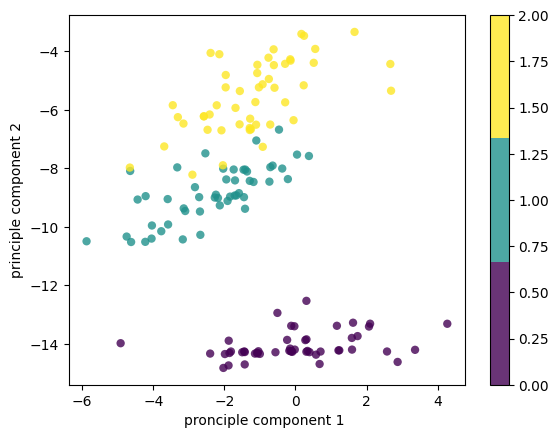

In [37]:
plt.scatter(x1,x2, c=y, edgecolors="none", alpha=0.8, cmap=plt.cm.get_cmap("viridis",3))
plt.xlabel("pronciple component 1 ")
plt.ylabel("principle component 2")
plt.colorbar()
plt.show()

In [38]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

In [39]:
## lets generate the data 

In [40]:
x = np.random.normal(0,1,(100,4))
x

array([[ 2.53775265e-01,  1.85505096e+00, -6.04592066e-02,
        -1.93492193e+00],
       [ 4.04916653e-01,  2.73962169e-01,  7.04885821e-01,
        -2.77111211e-01],
       [-1.41162692e+00, -2.88549276e+00,  9.52790579e-02,
        -3.08881591e-02],
       [ 2.66100221e+00,  3.28704011e-01, -4.31951479e-01,
        -1.55924864e+00],
       [-4.70608561e-01, -1.41674711e+00, -1.18514607e+00,
        -1.00867222e+00],
       [ 1.23450589e+00,  1.58953588e+00, -1.19072219e+00,
        -1.86884242e-01],
       [-1.42420084e+00, -1.10790702e+00, -1.01505785e+00,
        -3.48171402e-01],
       [ 6.75530830e-01,  1.45764788e+00, -3.52155609e-03,
        -3.93172495e-01],
       [-1.63436989e+00, -1.02428736e+00, -4.47229647e-02,
        -1.72271293e+00],
       [ 2.54353716e+00, -7.64671592e-01, -6.93214379e-01,
         1.15309783e+00],
       [ 9.81117036e-01,  6.92011966e-03, -6.22202703e-01,
        -9.48167091e-01],
       [-7.07360454e-01,  1.12467324e+00,  5.21092000e-02,
      

In [41]:
x.shape

(100, 4)

In [43]:
x[:,2] = 3*x[:,0] - 2*x[:,1] + np.random.normal(0,0.1,100)
x[:,3] = 1.5*x[:,0] - 0.5*x[:,1] + np.random.normal(0,0.1,100)
x.shape

(100, 4)

In [44]:
x

array([[ 2.53775265e-01,  1.85505096e+00, -2.82620855e+00,
        -3.73258782e-01],
       [ 4.04916653e-01,  2.73962169e-01,  6.82654765e-01,
         3.62489904e-01],
       [-1.41162692e+00, -2.88549276e+00,  1.48903991e+00,
        -8.76631414e-01],
       [ 2.66100221e+00,  3.28704011e-01,  7.14858669e+00,
         3.70232963e+00],
       [-4.70608561e-01, -1.41674711e+00,  1.54170088e+00,
        -6.90365992e-02],
       [ 1.23450589e+00,  1.58953588e+00,  5.64765999e-01,
         1.04355419e+00],
       [-1.42420084e+00, -1.10790702e+00, -2.13444418e+00,
        -1.62030974e+00],
       [ 6.75530830e-01,  1.45764788e+00, -8.21373820e-01,
         2.49829801e-01],
       [-1.63436989e+00, -1.02428736e+00, -2.87351529e+00,
        -2.10170667e+00],
       [ 2.54353716e+00, -7.64671592e-01,  9.19587095e+00,
         4.26141030e+00],
       [ 9.81117036e-01,  6.92011966e-03,  3.02252939e+00,
         1.55480173e+00],
       [-7.07360454e-01,  1.12467324e+00, -4.29542178e+00,
      

In [50]:
np.mean(x,axis=0)

array([ 0.08903204, -0.00643197,  0.27823958,  0.12753548])

In [51]:
x = x - np.mean(x, axis = 0)
x

array([[ 1.64743222e-01,  1.86148293e+00, -3.10444813e+00,
        -5.00794263e-01],
       [ 3.15884610e-01,  2.80394140e-01,  4.04415185e-01,
         2.34954423e-01],
       [-1.50065896e+00, -2.87906079e+00,  1.21080033e+00,
        -1.00416689e+00],
       [ 2.57197017e+00,  3.35135982e-01,  6.87034711e+00,
         3.57479415e+00],
       [-5.59640604e-01, -1.41031513e+00,  1.26346130e+00,
        -1.96572080e-01],
       [ 1.14547385e+00,  1.59596785e+00,  2.86526419e-01,
         9.16018707e-01],
       [-1.51323289e+00, -1.10147504e+00, -2.41268376e+00,
        -1.74784522e+00],
       [ 5.86498787e-01,  1.46407985e+00, -1.09961340e+00,
         1.22294320e-01],
       [-1.72340193e+00, -1.01785539e+00, -3.15175487e+00,
        -2.22924215e+00],
       [ 2.45450512e+00, -7.58239621e-01,  8.91763137e+00,
         4.13387482e+00],
       [ 8.92084993e-01,  1.33520908e-02,  2.74428981e+00,
         1.42726625e+00],
       [-7.96392497e-01,  1.13110522e+00, -4.57366136e+00,
      

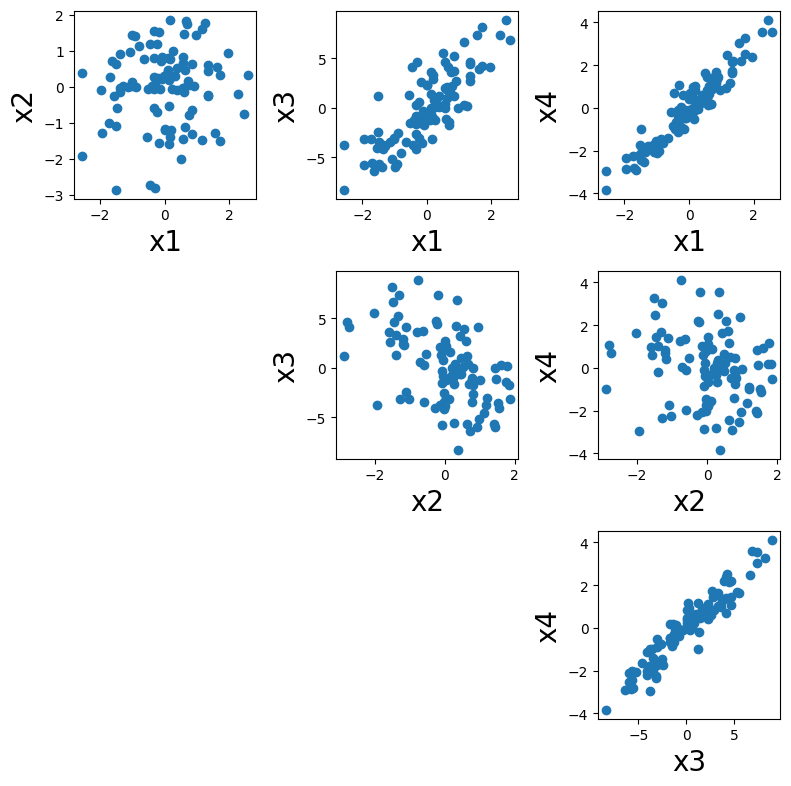

In [54]:
plt.figure(figsize=(10,10))

for i in range(4):
    for j in range(4):
        if j > i :
            plt.subplot(4,4,i*4+j+1)
            plt.scatter(x[:,i], x[:,j])
            plt.xlabel(f"x{i+1}", fontsize = 20)
            plt.ylabel(f"x{j+1}", fontsize = 20)
plt.tight_layout()
plt.show()

In [55]:
## x1 and x2 do not seem to be correlated
## x1 seems very correlated with both x3 and x4 
## x2 seems somewhat correlated with both x3 and x4 
## x3 and x4 seem very correlated

In [56]:
pca = PCA(3)
pca.fit(x)

PCA(n_components=3)

In [57]:
pca.components_

array([[ 0.22147929, -0.11238884,  0.8895653 ,  0.38339176],
       [-0.47318166, -0.79396672,  0.16570939, -0.34388424],
       [-0.21004507, -0.31857506, -0.35565879,  0.85316928]])

In [58]:
pca.components_.T

array([[ 0.22147929, -0.47318166, -0.21004507],
       [-0.11238884, -0.79396672, -0.31857506],
       [ 0.8895653 ,  0.16570939, -0.35565879],
       [ 0.38339176, -0.34388424,  0.85316928]])

In [59]:
for i, component in enumerate(pca.components_):
    print(f"principle component {i}")
    print(component)
    print(" ")

principle component 0
[ 0.22147929 -0.11238884  0.8895653   0.38339176]
 
principle component 1
[-0.47318166 -0.79396672  0.16570939 -0.34388424]
 
principle component 2
[-0.21004507 -0.31857506 -0.35565879  0.85316928]
 


In [61]:
x.shape

(100, 4)

In [60]:
## from scratch

In [62]:
## covariance matrix of the data
cov_matrix = sum([x[i].reshape(-1,1) @ x[i].reshape(1,-1) for i in range(100)]) / 100
cov_matrix

array([[ 1.12825011,  0.10432182,  3.1779267 ,  1.63961069],
       [ 0.10432182,  1.08275288, -1.84826516, -0.34335855],
       [ 3.1779267 , -1.84826516, 13.23638593,  5.60686838],
       [ 1.63961069, -0.34335855,  5.60686838,  2.62043821]])

In [66]:
x[0].reshape(-1,1) * x[0].reshape(1,-1)

array([[ 0.02714033,  0.3066667 , -0.51143679, -0.08250246],
       [ 0.3066667 ,  3.4651187 , -5.7788772 , -0.93221997],
       [-0.51143679, -5.7788772 ,  9.6375982 ,  1.55468981],
       [-0.08250246, -0.93221997,  1.55468981,  0.25079489]])

In [67]:
x[1].reshape(-1,1) * x[1].reshape(1,-1)

array([[0.09978309, 0.08857219, 0.12774853, 0.07421849],
       [0.08857219, 0.07862087, 0.11339565, 0.06587984],
       [0.12774853, 0.11339565, 0.16355164, 0.09501914],
       [0.07421849, 0.06587984, 0.09501914, 0.05520358]])

In [68]:
[x[0].reshape(-1,1) * x[0].reshape(1,-1), x[1].reshape(-1,1) * x[1].reshape(1,-1)]

[array([[ 0.02714033,  0.3066667 , -0.51143679, -0.08250246],
        [ 0.3066667 ,  3.4651187 , -5.7788772 , -0.93221997],
        [-0.51143679, -5.7788772 ,  9.6375982 ,  1.55468981],
        [-0.08250246, -0.93221997,  1.55468981,  0.25079489]]),
 array([[0.09978309, 0.08857219, 0.12774853, 0.07421849],
        [0.08857219, 0.07862087, 0.11339565, 0.06587984],
        [0.12774853, 0.11339565, 0.16355164, 0.09501914],
        [0.07421849, 0.06587984, 0.09501914, 0.05520358]])]

In [69]:
sum([x[0].reshape(-1,1) * x[0].reshape(1,-1), x[1].reshape(-1,1) * x[1].reshape(1,-1)])

array([[ 1.26923416e-01,  3.95238889e-01, -3.83688255e-01,
        -8.28397401e-03],
       [ 3.95238889e-01,  3.54373957e+00, -5.66548156e+00,
        -8.66340128e-01],
       [-3.83688255e-01, -5.66548156e+00,  9.80114984e+00,
         1.64970895e+00],
       [-8.28397401e-03, -8.66340128e-01,  1.64970895e+00,
         3.05998475e-01]])

In [70]:
sum([x[0].reshape(-1,1) * x[0].reshape(1,-1), x[1].reshape(-1,1) * x[1].reshape(1,-1)])/2

array([[ 6.34617081e-02,  1.97619445e-01, -1.91844127e-01,
        -4.14198700e-03],
       [ 1.97619445e-01,  1.77186979e+00, -2.83274078e+00,
        -4.33170064e-01],
       [-1.91844127e-01, -2.83274078e+00,  4.90057492e+00,
         8.24854475e-01],
       [-4.14198700e-03, -4.33170064e-01,  8.24854475e-01,
         1.52999237e-01]])

In [71]:
cov_matrix

array([[ 1.12825011,  0.10432182,  3.1779267 ,  1.63961069],
       [ 0.10432182,  1.08275288, -1.84826516, -0.34335855],
       [ 3.1779267 , -1.84826516, 13.23638593,  5.60686838],
       [ 1.63961069, -0.34335855,  5.60686838,  2.62043821]])

In [79]:
x0 = np.mean(x[:,0])
x1 = np.mean(x[:,1])
cov01 = sum((x[:,0] - x0)*(x[:,1] - x1))/100
cov01

0.10432182147502857

In [ ]:
## we get the same values 

In [72]:
eigenvec = np.linalg.eig(cov_matrix)
eigenvec

(array([1.66776133e+01, 1.38196248e+00, 5.87354365e-04, 7.66401026e-03]),
 array([[ 0.22147929,  0.47318166,  0.82639404, -0.21004507],
        [-0.11238884,  0.79396672, -0.50546566, -0.31857506],
        [ 0.8895653 , -0.16570939, -0.23392476, -0.35565879],
        [ 0.38339176,  0.34388424, -0.08280438,  0.85316928]]))

In [80]:
## decending order of eigenvalues
odering = np.argsort(eigenvec[0])[::-1]

In [81]:
odering

array([0, 1, 3, 2], dtype=int64)

In [84]:
eigenvec[1]

array([[ 0.22147929,  0.47318166,  0.82639404, -0.21004507],
       [-0.11238884,  0.79396672, -0.50546566, -0.31857506],
       [ 0.8895653 , -0.16570939, -0.23392476, -0.35565879],
       [ 0.38339176,  0.34388424, -0.08280438,  0.85316928]])

In [88]:
principle_comp_byhand = eigenvec[1][:,odering]
principle_comp_byhand

array([[ 0.22147929,  0.47318166, -0.21004507,  0.82639404],
       [-0.11238884,  0.79396672, -0.31857506, -0.50546566],
       [ 0.8895653 , -0.16570939, -0.35565879, -0.23392476],
       [ 0.38339176,  0.34388424,  0.85316928, -0.08280438]])

In [89]:
principle_comp_byhand[:3]

array([[ 0.22147929,  0.47318166, -0.21004507,  0.82639404],
       [-0.11238884,  0.79396672, -0.31857506, -0.50546566],
       [ 0.8895653 , -0.16570939, -0.35565879, -0.23392476]])

In [86]:
pca.components_

array([[ 0.22147929, -0.11238884,  0.8895653 ,  0.38339176],
       [-0.47318166, -0.79396672,  0.16570939, -0.34388424],
       [-0.21004507, -0.31857506, -0.35565879,  0.85316928]])